# PCA

Principal Component Analysis for Dimensionality Reduction

https://towardsdatascience.com/principal-component-analysis-for-dimensionality-reduction-115a3d157bad

[[ 40793.24535866  -4989.77634401]
 [ 32702.57687136 -17920.26931147]
 [ 41410.61046429 -10770.78909253]
 ...
 [ 46478.23107323  -7904.12047121]
 [-46317.08385613 -23446.06018778]
 [-43236.07567001 -16943.64334634]]


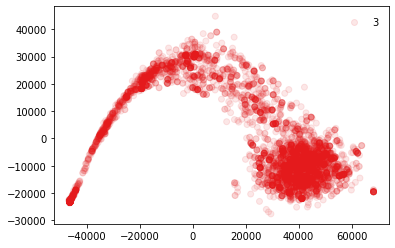

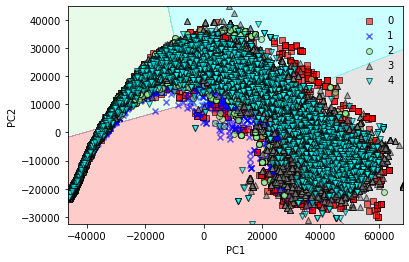

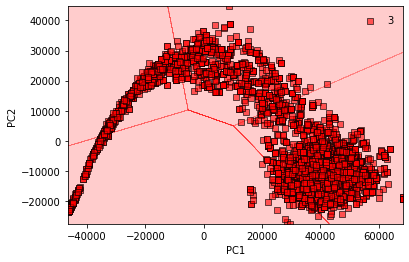

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler




with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data/Multi_y_train_Large_orig.npy', 'rb') as f:
  y_train = np.load(f,allow_pickle=True)


with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data/Multi_X_train_Large_idx.npy', 'rb') as f:
  X_train = np.load(f,allow_pickle=True)

with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data/Multi_y_test_orig.npy', 'rb') as f:
  y_test = np.load(f,allow_pickle=True)


with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data/Multi_X_test_idx.npy', 'rb') as f:
  X_test = np.load(f,allow_pickle=True)

from keras.preprocessing import sequence
X_train = sequence.pad_sequences(X_train, maxlen=90)
X_test = sequence.pad_sequences(X_test, maxlen=90)

X_ped = []
X_lac = []
X_nur = []
X_preg = []
X_ger = []
for i in range(len(y_test)):
  if y_test[i] == 0:
    X_ped.append(X_test[i])
y_ped = [0] * len(X_ped)
for i in range(len(y_test)):
  if y_test[i] == 1:
    X_lac.append(X_test[i])
y_lac = [1] * len(X_lac)
for i in range(len(y_test)):
  if y_test[i] == 2:
    X_nur.append(X_test[i])
y_nur = [2] * len(X_nur)
for i in range(len(y_test)):
  if y_test[i] == 3:
    X_preg.append(X_test[i])
y_preg = [3] * len(X_preg)
for i in range(len(y_test)):
  if y_test[i] == 4:
    X_ger.append(X_test[i])
y_ger = [4] * len(X_ger)





# X_test = X_ped +  X_ger
# y_test = y_ped +  y_ger

X_test = X_preg
y_test = y_preg



# intialize pca and logistic regression model
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='auto', solver='liblinear')

# fit and transform data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_test_pca)
lr.fit(X_train_pca, y_train)


plt.figure()
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='Set1', alpha=0.1)
plt.legend(*scatter.legend_elements(), loc="upper right", frameon=False)
plt.savefig('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Pediatrics Figures/Encoding2DVis_lr_PCA_test.pdf')
plt.show()




from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=100):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=[cmap(idx)],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)# plot decision regions for training set


plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='upper right',frameon=False)
plt.savefig('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Pediatrics Figures/Encoding2DVis_lr_PCA_dec_reg_train.pdf')
plt.show()


# plot decision regions for test set
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='upper right',frameon=False)
plt.savefig('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Pediatrics Figures/Encoding2DVis_lr_PCA_dec_reg_test.pdf')
plt.show()


# t-SNE

https://www.kaggle.com/colinmorris/visualizing-embeddings-with-t-sne

## Plot Train small, Train Large, Test

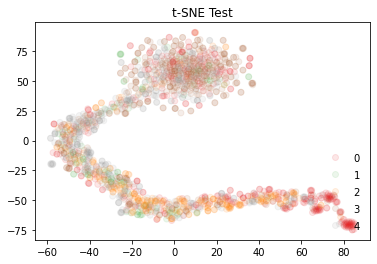

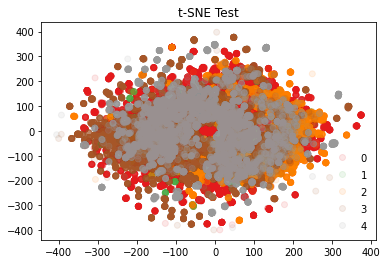

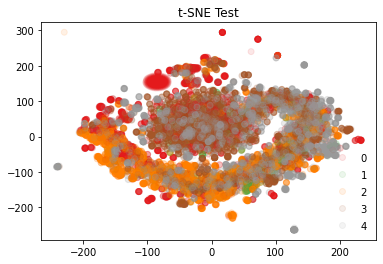

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


from sklearn.manifold import TSNE


# with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data/Multi_y_train_Small.npy', 'rb') as f:
#   y_train_small = np.load(f,allow_pickle=True)
# y_train_small_orig = []
# for i in range(len(y_train_small)):
#   if (y_train_small[i][0] == 1):
#     y_train_small_orig.append(0)
#   elif (y_train_small[i][1] == 1):
#     y_train_small_orig.append(1)
#   elif (y_train_small[i][2] == 1):
#     y_train_small_orig.append(2)
#   elif (y_train_small[i][3] == 1):
#     y_train_small_orig.append(3)
#   elif (y_train_small[i][4] == 1):
#     y_train_small_orig.append(4)
# print(y_train_small_orig)
# with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data/Multi_y_train_Small_orig.npy', 'wb') as f:
#   np.save(f,np.array(y_train_small_orig))
with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data/Multi_y_train_Small_orig.npy', 'rb') as f:
  y_train_small_orig = np.load(f,allow_pickle=True)

with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data/Multi_X_train_Small_idx.npy', 'rb') as f:
  X_train_small = np.load(f,allow_pickle=True)


with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data/Multi_X_train_Small_idx.npy', 'rb') as f:
  X_train_small = np.load(f,allow_pickle=True)


with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data/Multi_y_train_Large_orig.npy', 'rb') as f:
  y_train_large = np.load(f,allow_pickle=True)


with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data/Multi_X_train_Large_idx.npy', 'rb') as f:
  X_train_large = np.load(f,allow_pickle=True)

with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data/Multi_y_test_orig.npy', 'rb') as f:
  y_test = np.load(f,allow_pickle=True)


with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data/Multi_X_test_idx.npy', 'rb') as f:
  X_test = np.load(f,allow_pickle=True)

from keras.preprocessing import sequence
X_train_small = sequence.pad_sequences(X_train_small, maxlen=90)
X_train_large = sequence.pad_sequences(X_train_large, maxlen=90)
X_test = sequence.pad_sequences(X_test, maxlen=90)


tsne = TSNE(random_state=1, n_iter=10000, metric="cosine")


embs_train_small = tsne.fit_transform(X_train_small)
plt.figure()
scatter = plt.scatter(embs_train_small[:, 0], embs_train_small[:, 1], c=y_train_small_orig, cmap='Set1', alpha=0.1)
#plt.title('t-SNE Test')
plt.legend(*scatter.legend_elements(), loc="lower right", frameon=False)
plt.savefig('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Pediatrics Figures/Encoding2DVis_tsne_train_small.pdf')
plt.show()


tsne = TSNE(random_state=1, n_iter=10000, metric="cosine")


embs_train_large = tsne.fit_transform(X_train_large)
with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data/t-SNE_Embs_Train_Large.npy', 'wb') as f:
   np.save(f,np.array(embs_train_large), allow_pickle=True)
plt.figure()
scatter = plt.scatter(embs_train_large[:, 0], embs_train_large[:, 1], c=y_train_large, cmap='Set1', alpha=0.1)
#plt.title('t-SNE Test')
plt.legend(*scatter.legend_elements(), loc="lower right", frameon=False)
plt.savefig('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Pediatrics Figures/Encoding2DVis_tsne_train_large.pdf')
plt.show()


embs = tsne.fit_transform(X_test)
plt.figure()
scatter = plt.scatter(embs[:, 0], embs[:, 1], c=y_test, cmap='Set1', alpha=0.1)
#plt.title('t-SNE Test')
plt.legend(*scatter.legend_elements(), loc="lower right", frameon=False)
plt.savefig('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Pediatrics Figures/Encoding2DVis_tsne_test.pdf')
plt.show()

## Plot Train large by Category

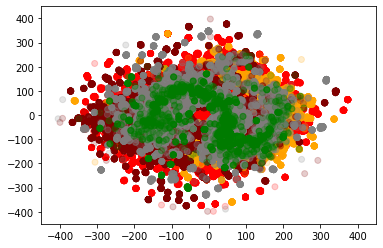

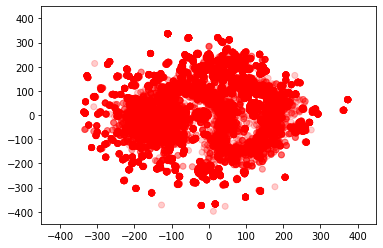

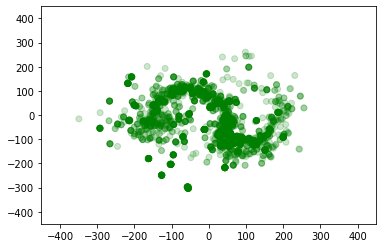

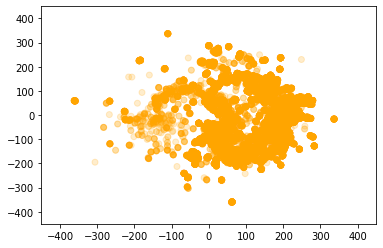

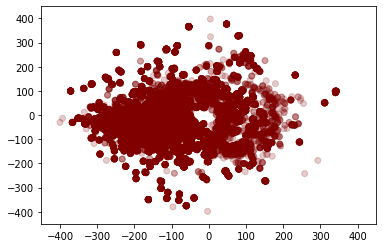

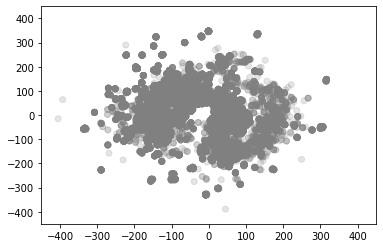

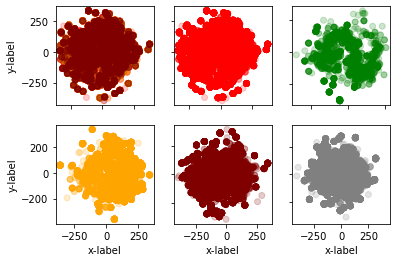

In [ ]:
# plot single category | t-SNE | Train
import numpy as np
import matplotlib.pyplot as plt


with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data/t-SNE_Embs_Train_Large.npy', 'rb') as f:
   embs_train_large = np.load(f,allow_pickle=True)

with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data/Multi_y_train_Large_orig.npy', 'rb') as f:
  y_train_large = np.load(f,allow_pickle=True)


import matplotlib
colors = ['red','green', 'orange', 'maroon', 'gray']
cat_length = [28769, 28769+3293, 28769+3293+18108, 28769+3293+18108+23844, 28769+3293+18108+23844+19512]
categories = ['ped', 'lac', 'nur', 'preg','ger']

plt.figure()
scatter = plt.scatter(embs_train_large[0:cat_length[0], 0], embs_train_large[0:cat_length[0], 1], c=y_train_large[0:cat_length[0]], cmap=matplotlib.colors.ListedColormap(colors[0]), alpha=0.2) #ped
scatter = plt.scatter(embs_train_large[cat_length[1]:cat_length[2], 0], embs_train_large[cat_length[1]:cat_length[2], 1], c=y_train_large[cat_length[1]:cat_length[2]], cmap=matplotlib.colors.ListedColormap(colors[2]), alpha=0.2) #nur
scatter = plt.scatter(embs_train_large[cat_length[2]:cat_length[3], 0], embs_train_large[cat_length[2]:cat_length[3], 1], c=y_train_large[cat_length[2]:cat_length[3]], cmap=matplotlib.colors.ListedColormap(colors[3]), alpha=0.2) #preg
scatter = plt.scatter(embs_train_large[cat_length[3]:cat_length[4], 0], embs_train_large[cat_length[3]:cat_length[4], 1], c=y_train_large[cat_length[3]:cat_length[4]], cmap=matplotlib.colors.ListedColormap(colors[4]), alpha=0.2) #ger
scatter = plt.scatter(embs_train_large[cat_length[0]:cat_length[1], 0], embs_train_large[cat_length[0]:cat_length[1], 1], c=y_train_large[cat_length[0]:cat_length[1]], cmap=matplotlib.colors.ListedColormap(colors[1]), alpha=0.2) #lac
plt.xlim(-450, 450)
plt.ylim(-450, 450)
plt.savefig('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Pediatrics Figures/Encoding2DVis_tsne_train_large.pdf')
plt.show()

cat_length = [28769, 3293, 18108, 23844, 19512]
#plt.figure()
k = 0
for i, cat in enumerate(categories):
  plt.figure()
  scatter = plt.scatter(embs_train_large[k:k+cat_length[i], 0], embs_train_large[k:k+cat_length[i], 1], c=y_train_large[k:k+cat_length[i]], cmap=matplotlib.colors.ListedColormap(colors[i]), alpha=0.2)
  #plt.legend(*scatter.legend_elements(), loc="lower center", frameon=False)
  plt.xlim(-450, 450)
  plt.ylim(-450, 450)
  plt.savefig('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Pediatrics Figures/Encoding2DVis_tsne_train_large_'+cat+'.pdf')
  plt.show()
  k = k + cat_length[i]
#plt.show()



# ----------------------------------------
# make stacked plots https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html
fig, axs = plt.subplots(2, 3)
axs[0, 0].scatter(embs_train_large[0:cat_length[0], 0], embs_train_large[0:cat_length[0], 1], c=y_train_large[0:cat_length[0]], cmap=matplotlib.colors.ListedColormap(colors[0]), alpha=0.2) #ped
axs[0, 0].scatter(embs_train_large[cat_length[1]:cat_length[2], 0], embs_train_large[cat_length[1]:cat_length[2], 1], c=y_train_large[cat_length[1]:cat_length[2]], cmap=matplotlib.colors.ListedColormap(colors[2]), alpha=0.2) #nur
axs[0, 0].scatter(embs_train_large[cat_length[2]:cat_length[3], 0], embs_train_large[cat_length[2]:cat_length[3], 1], c=y_train_large[cat_length[2]:cat_length[3]], cmap=matplotlib.colors.ListedColormap(colors[3]), alpha=0.2) #preg
axs[0, 0].scatter(embs_train_large[cat_length[3]:cat_length[4], 0], embs_train_large[cat_length[3]:cat_length[4], 1], c=y_train_large[cat_length[3]:cat_length[4]], cmap=matplotlib.colors.ListedColormap(colors[4]), alpha=0.2) #ger
axs[0, 0].scatter(embs_train_large[cat_length[0]:cat_length[1], 0], embs_train_large[cat_length[0]:cat_length[1], 1], c=y_train_large[cat_length[0]:cat_length[1]], cmap=matplotlib.colors.ListedColormap(colors[1]), alpha=0.2) #lac
plt.xlim(-450, 450)
plt.ylim(-450, 450)


k = 0
r = 0
c = 0 
for i, cat in enumerate(categories):
  #plt.figure()
  if i == 0:
    r = 0
    c = 1
  elif i == 1:
    r = 0
    c = 2
  elif i == 2:
    r = 1
    c = 0
  elif i == 3:
    r = 1
    c = 1
  elif i == 4:
    r = 1
    c = 2
  axs[r, c].scatter(embs_train_large[k:k+cat_length[i], 0], embs_train_large[k:k+cat_length[i], 1], c=y_train_large[k:k+cat_length[i]], cmap=matplotlib.colors.ListedColormap(colors[i]), alpha=0.2)
  #plt.legend(*scatter.legend_elements(), loc="lower center", frameon=False)
  plt.xlim(-450, 450)
  plt.ylim(-450, 450)
  k = k + cat_length[i]


# axs[0, 1].plot(plt)
# axs[0, 2]
# axs[1, 0].plot(x, -y, 'tab:green')
# axs[1, 1].plot(x, -y, 'tab:red')
# axs[1, 2]
for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

## Stacked plots - Train large

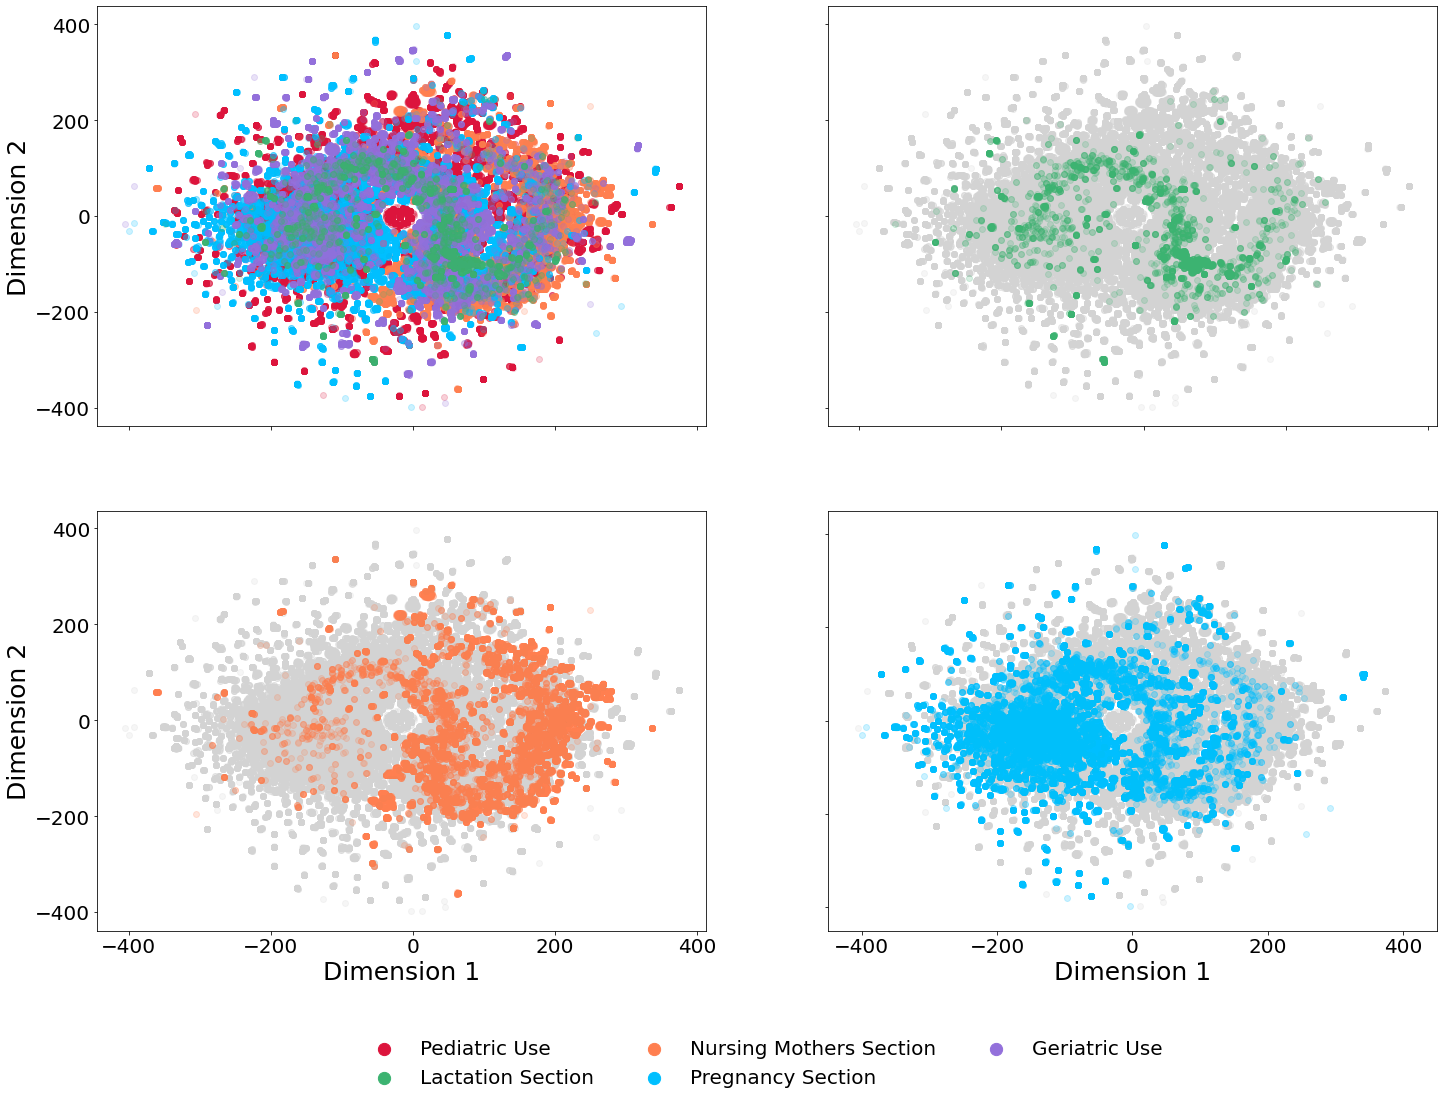

In [ ]:
# OPTION 1
# ----------------------------------------
# make stacked plots https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines

colors = ['red','green', 'orange', 'blue', 'purple']
colors = ['#DC143C', '#3CB371', '#FF7F50', '#00BFFF', '#9370DB', ]
gray_hex = '#D3D3D3'
cat_length = [28769, 28769+3293, 28769+3293+18108, 28769+3293+18108+23844, 28769+3293+18108+23844+19512]
categories = ['ped', 'lac', 'nur', 'preg','ger']


fig, axs = plt.subplots(2, 2, figsize=(24,17))
# --- ALL
scatter_ped_1 = axs[0, 0].plot(embs_train_large[0:cat_length[0], 0], embs_train_large[0:cat_length[0], 1], 'o',rasterized=True, color = (colors[0]), alpha=0.2, label = "Pediatric Use") #ped
scatter_nur_1 = axs[0, 0].plot(embs_train_large[cat_length[1]:cat_length[2], 0], embs_train_large[cat_length[1]:cat_length[2], 1], 'o',rasterized=True, color = (colors[2]), alpha=0.2, label = "Nursing Mothers Section") #nur
scatter_preg_1 = axs[0, 0].plot(embs_train_large[cat_length[2]:cat_length[3], 0], embs_train_large[cat_length[2]:cat_length[3], 1], 'o',rasterized=True, color = (colors[3]), alpha=0.2, label = "Pregnancy Section") #preg
scatter_ger_1 = axs[0, 0].plot(embs_train_large[cat_length[3]:cat_length[4], 0], embs_train_large[cat_length[3]:cat_length[4], 1], 'o',rasterized=True, color = (colors[4]), alpha=0.2, label = "Geriatric Use") #ger
scatter_lac_1 = axs[0, 0].plot(embs_train_large[cat_length[0]:cat_length[1], 0], embs_train_large[cat_length[0]:cat_length[1], 1], 'o',rasterized=True, color = (colors[1]), alpha=0.2, label = "Lactation Section") #lac
plt.xlim(-450, 450)
plt.ylim(-450, 450)
# --- LAC
scatter_ped_2 = axs[0, 1].plot(embs_train_large[0:cat_length[0], 0], embs_train_large[0:cat_length[0], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Pediatric Use") #ped
scatter_nur_2 = axs[0, 1].plot(embs_train_large[cat_length[1]:cat_length[2], 0], embs_train_large[cat_length[1]:cat_length[2], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Nursing Mothers Section") #nur
scatter_preg_2 = axs[0, 1].plot(embs_train_large[cat_length[2]:cat_length[3], 0], embs_train_large[cat_length[2]:cat_length[3], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Pregnancy Section") #preg
scatter_ger_2 = axs[0, 1].plot(embs_train_large[cat_length[3]:cat_length[4], 0], embs_train_large[cat_length[3]:cat_length[4], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Geriatric Use") #ger
scatter_lac_2 = axs[0, 1].plot(embs_train_large[cat_length[0]:cat_length[1], 0], embs_train_large[cat_length[0]:cat_length[1], 1], 'o',rasterized=True, color = (colors[1]), alpha=0.2, label = "Lactation Section") #lac
plt.xlim(-450, 450)
plt.ylim(-450, 450)
# --- NUR
scatter_ped_3 = axs[1, 0].plot(embs_train_large[0:cat_length[0], 0], embs_train_large[0:cat_length[0], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Pediatric Use") #ped
scatter_preg_3 = axs[1, 0].plot(embs_train_large[cat_length[2]:cat_length[3], 0], embs_train_large[cat_length[2]:cat_length[3], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Pregnancy Section") #preg
scatter_ger_3 = axs[1, 0].plot(embs_train_large[cat_length[3]:cat_length[4], 0], embs_train_large[cat_length[3]:cat_length[4], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Geriatric Use") #ger
scatter_lac_3 = axs[1, 0].plot(embs_train_large[cat_length[0]:cat_length[1], 0], embs_train_large[cat_length[0]:cat_length[1], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Lactation Section") #lac
scatter_nur_3 = axs[1, 0].plot(embs_train_large[cat_length[1]:cat_length[2], 0], embs_train_large[cat_length[1]:cat_length[2], 1], 'o',rasterized=True, color = (colors[2]), alpha=0.2, label = "Nursing Mothers Section") #nur
plt.xlim(-450, 450)
plt.ylim(-450, 450)
# --- PREG
scatter_ped_4 = axs[1, 1].plot(embs_train_large[0:cat_length[0], 0], embs_train_large[0:cat_length[0], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Pediatric Use") #ped
scatter_nur_4 = axs[1, 1].plot(embs_train_large[cat_length[1]:cat_length[2], 0], embs_train_large[cat_length[1]:cat_length[2], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Nursing Mothers Section") #nur
scatter_ger_4 = axs[1, 1].plot(embs_train_large[cat_length[3]:cat_length[4], 0], embs_train_large[cat_length[3]:cat_length[4], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Geriatric Use") #ger
scatter_lac_4 = axs[1, 1].plot(embs_train_large[cat_length[0]:cat_length[1], 0], embs_train_large[cat_length[0]:cat_length[1], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Lactation Section") #lac
scatter_preg_4 = axs[1, 1].plot(embs_train_large[cat_length[2]:cat_length[3], 0], embs_train_large[cat_length[2]:cat_length[3], 1], 'o',rasterized=True, color = (colors[3]), alpha=0.2, label = "Pregnancy Section") #preg
plt.xlim(-450, 450)
plt.ylim(-450, 450)
# -------- LEGEND
ped_leg = plt.scatter([], [], color = colors[0], label='Pediatric Use', alpha = 1, s = 150)
lac_leg = plt.scatter([], [], color = colors[1], label='Lactation Section', alpha = 1, s = 150)
nur_leg = plt.scatter([], [], color = colors[2], label='Nursing Mothers Section', alpha = 1, s = 150)
preg_leg = plt.scatter([], [], color = colors[3], label='Pregnancy Section', alpha = 1, s = 150)
ger_leg = plt.scatter([], [], color = colors[4], label='Geriatric Use', alpha = 1, s = 150)
fig.legend(handles=[ped_leg, lac_leg, nur_leg, preg_leg, ger_leg], loc="lower left", bbox_to_anchor = (0.2, -0.01), ncol = 3, frameon=False)


for ax in axs.flat:
    #ax.set(xlabel = 'Dimension 1', ylabel = 'Dimension 2')
    ax.set_xlabel('Dimension 1', fontsize = 25)
    ax.set_ylabel('Dimension 2', fontsize = 25)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.rcParams.update({'font.size': 25})
plt.savefig('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Pediatrics Figures/Encoding2DVis_tsne_train_large_stack.pdf')
plt.show()

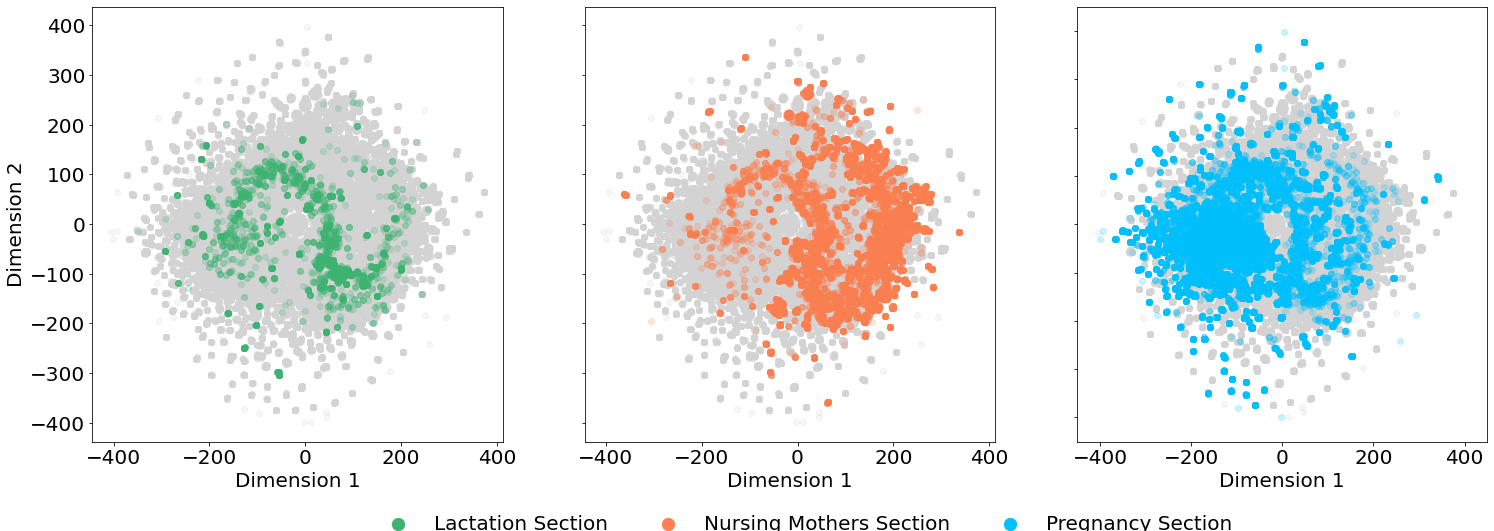

In [ ]:
# OPTION 2
# ----------------------------------------
# make stacked plots https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines

colors = ['red','green', 'orange', 'blue', 'purple']
colors = ['#DC143C', '#3CB371', '#FF7F50', '#00BFFF', '#9370DB', ]
gray_hex = '#D3D3D3'
cat_length = [28769, 28769+3293, 28769+3293+18108, 28769+3293+18108+23844, 28769+3293+18108+23844+19512]
categories = ['ped', 'lac', 'nur', 'preg','ger']


fig, axs = plt.subplots(1, 3, figsize=(25,8))
plt.rcParams.update({'font.size': 20})
# --- LAC
scatter_ped_2 = axs[0].plot(embs_train_large[0:cat_length[0], 0], embs_train_large[0:cat_length[0], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Pediatric Use") #ped
scatter_nur_2 = axs[0].plot(embs_train_large[cat_length[1]:cat_length[2], 0], embs_train_large[cat_length[1]:cat_length[2], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Nursing Mothers Section") #nur
scatter_preg_2 = axs[0].plot(embs_train_large[cat_length[2]:cat_length[3], 0], embs_train_large[cat_length[2]:cat_length[3], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Pregnancy Section") #preg
scatter_ger_2 = axs[0].plot(embs_train_large[cat_length[3]:cat_length[4], 0], embs_train_large[cat_length[3]:cat_length[4], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Geriatric Use") #ger
scatter_lac_2 = axs[0].plot(embs_train_large[cat_length[0]:cat_length[1], 0], embs_train_large[cat_length[0]:cat_length[1], 1], 'o',rasterized=True, color = (colors[1]), alpha=0.2, label = "Lactation Section") #lac
plt.xlim(-450, 450)
plt.ylim(-450, 450)
# --- NUR
scatter_ped_3 = axs[1].plot(embs_train_large[0:cat_length[0], 0], embs_train_large[0:cat_length[0], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Pediatric Use") #ped
scatter_preg_3 = axs[1].plot(embs_train_large[cat_length[2]:cat_length[3], 0], embs_train_large[cat_length[2]:cat_length[3], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Pregnancy Section") #preg
scatter_ger_3 = axs[1].plot(embs_train_large[cat_length[3]:cat_length[4], 0], embs_train_large[cat_length[3]:cat_length[4], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Geriatric Use") #ger
scatter_lac_3 = axs[1].plot(embs_train_large[cat_length[0]:cat_length[1], 0], embs_train_large[cat_length[0]:cat_length[1], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Lactation Section") #lac
scatter_nur_3 = axs[1].plot(embs_train_large[cat_length[1]:cat_length[2], 0], embs_train_large[cat_length[1]:cat_length[2], 1], 'o',rasterized=True, color = (colors[2]), alpha=0.2, label = "Nursing Mothers Section") #nur
plt.xlim(-450, 450)
plt.ylim(-450, 450)
# --- PREG
scatter_ped_4 = axs[2].plot(embs_train_large[0:cat_length[0], 0], embs_train_large[0:cat_length[0], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Pediatric Use") #ped
scatter_nur_4 = axs[2].plot(embs_train_large[cat_length[1]:cat_length[2], 0], embs_train_large[cat_length[1]:cat_length[2], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Nursing Mothers Section") #nur
scatter_ger_4 = axs[2].plot(embs_train_large[cat_length[3]:cat_length[4], 0], embs_train_large[cat_length[3]:cat_length[4], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Geriatric Use") #ger
scatter_lac_4 = axs[2].plot(embs_train_large[cat_length[0]:cat_length[1], 0], embs_train_large[cat_length[0]:cat_length[1], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Lactation Section") #lac
scatter_preg_4 = axs[2].plot(embs_train_large[cat_length[2]:cat_length[3], 0], embs_train_large[cat_length[2]:cat_length[3], 1], 'o',rasterized=True, color = (colors[3]), alpha=0.2, label = "Pregnancy Section") #preg
plt.xlim(-450, 450)
plt.ylim(-450, 450)
# -------- LEGEND
#ped_leg = plt.scatter([], [], color = colors[0], label='Pediatric Use', alpha = 1, s = 150)
lac_leg = plt.scatter([], [], color = colors[1], label='Lactation Section', alpha = 1, s = 150)
nur_leg = plt.scatter([], [], color = colors[2], label='Nursing Mothers Section', alpha = 1, s = 150)
preg_leg = plt.scatter([], [], color = colors[3], label='Pregnancy Section', alpha = 1, s = 150)
#ger_leg = plt.scatter([], [], color = colors[4], label='Geriatric Use', alpha = 1, s = 150)
fig.legend(handles=[lac_leg, nur_leg, preg_leg], loc="lower left", bbox_to_anchor = (0.2, -0.035), ncol = 3, frameon=False)


for ax in axs.flat:
    #ax.set(xlabel = 'Dimension 1', ylabel = 'Dimension 2')
    ax.set_xlabel('Dimension 1', fontsize = 20)
    ax.set_ylabel('Dimension 2', fontsize = 20)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.savefig('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Pediatrics Figures/Encoding2DVis_tsne_train_large_stack_2.pdf')
plt.show()

## Final Plot


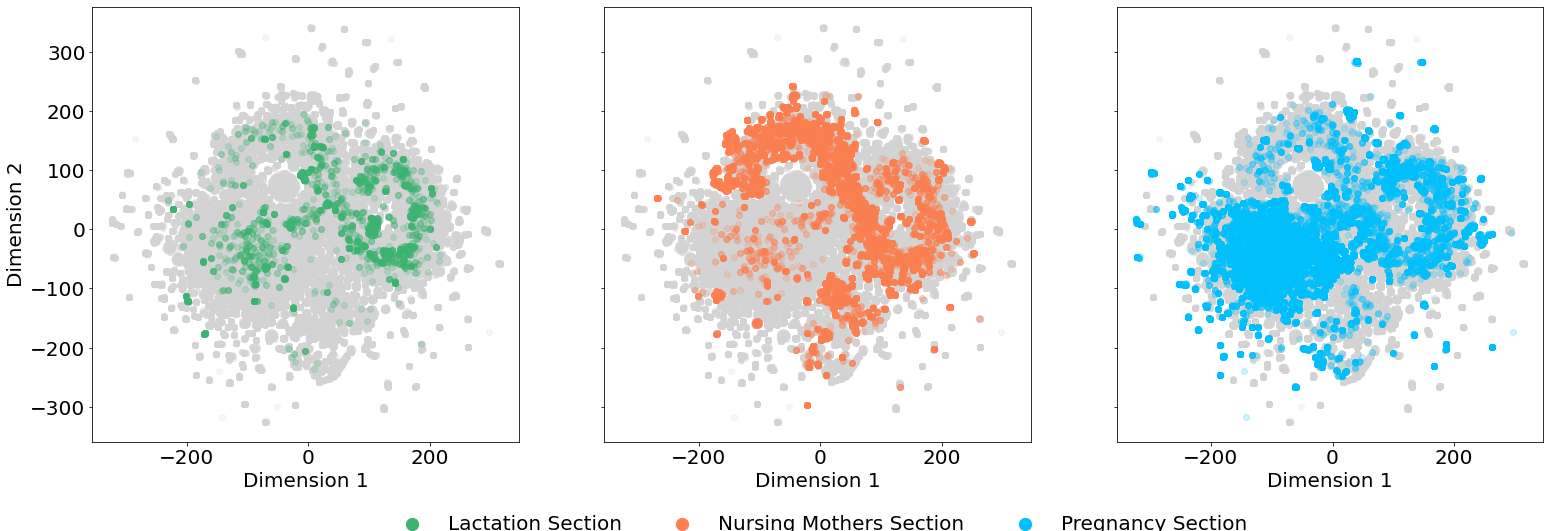

In [ ]:
# Using Embedding

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines

# from keras.preprocessing import sequence
# from tensorflow.python.keras.layers import Embedding, LSTM, Dense, Dropout
# from tensorflow.python.keras import Sequential

from sklearn.manifold import TSNE



with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data/Multi_y_train_Large_orig.npy', 'rb') as f:
  y_train_large = np.load(f,allow_pickle=True)


with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data New/Multi_X_train_Large_idx.npy', 'rb') as f:
  X_train_large = np.load(f,allow_pickle=True)


# # with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data/t-SNE_Embs_Train_Large.npy', 'rb') as f:
# #    embs_train_large = np.load(f,allow_pickle=True)

from keras.preprocessing import sequence
X_train_large = sequence.pad_sequences(X_train_large, maxlen=90)

tsne = TSNE(random_state=1, n_iter=10000, metric="cosine", perplexity=50)
embs_train_large_padded = tsne.fit_transform(X_train_large)

# # save embs_train_large_padded
# with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data New/t-SNE_Embs_Train_Large_padded.npy', 'wb') as f:
#   np.save(f,np.array(embs_train_large_padded), allow_pickle=True)
with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data New/t-SNE_Embs_Train_Large_padded.npy', 'rb') as f:
    embs_train_large_padded = np.load(f,allow_pickle=True)

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines

colors = ['red','green', 'orange', 'blue', 'purple']
colors = ['#DC143C', '#3CB371', '#FF7F50', '#00BFFF', '#9370DB', ]
gray_hex = '#D3D3D3'
cat_length = [28769, 28769+3293, 28769+3293+18108, 28769+3293+18108+23844, 28769+3293+18108+23844+19512]
categories = ['ped', 'lac', 'nur', 'preg','ger']

embs_train_large = embs_train_large_padded

fig, axs = plt.subplots(1, 3, figsize=(26,8))
plt.rcParams.update({'font.size': 20})
# --- LAC
scatter_ped_2 = axs[0].plot(embs_train_large[0:cat_length[0], 0], embs_train_large[0:cat_length[0], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Pediatric Use") #ped
scatter_nur_2 = axs[0].plot(embs_train_large[cat_length[1]:cat_length[2], 0], embs_train_large[cat_length[1]:cat_length[2], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Nursing Mothers Section") #nur
scatter_preg_2 = axs[0].plot(embs_train_large[cat_length[2]:cat_length[3], 0], embs_train_large[cat_length[2]:cat_length[3], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Pregnancy Section") #preg
scatter_ger_2 = axs[0].plot(embs_train_large[cat_length[3]:cat_length[4], 0], embs_train_large[cat_length[3]:cat_length[4], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Geriatric Use") #ger
scatter_lac_2 = axs[0].plot(embs_train_large[cat_length[0]:cat_length[1], 0], embs_train_large[cat_length[0]:cat_length[1], 1], 'o',rasterized=True, color = (colors[1]), alpha=0.2, label = "Lactation Section") #lac
# plt.xlim(-350, 350)
# plt.ylim(-350, 350)
# --- NUR
scatter_ped_3 = axs[1].plot(embs_train_large[0:cat_length[0], 0], embs_train_large[0:cat_length[0], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Pediatric Use") #ped
scatter_preg_3 = axs[1].plot(embs_train_large[cat_length[2]:cat_length[3], 0], embs_train_large[cat_length[2]:cat_length[3], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Pregnancy Section") #preg
scatter_ger_3 = axs[1].plot(embs_train_large[cat_length[3]:cat_length[4], 0], embs_train_large[cat_length[3]:cat_length[4], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Geriatric Use") #ger
scatter_lac_3 = axs[1].plot(embs_train_large[cat_length[0]:cat_length[1], 0], embs_train_large[cat_length[0]:cat_length[1], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Lactation Section") #lac
scatter_nur_3 = axs[1].plot(embs_train_large[cat_length[1]:cat_length[2], 0], embs_train_large[cat_length[1]:cat_length[2], 1], 'o',rasterized=True, color = (colors[2]), alpha=0.2, label = "Nursing Mothers Section") #nur
# plt.xlim(-350, 350)
# plt.ylim(-350, 350)
# --- PREG
scatter_ped_4 = axs[2].plot(embs_train_large[0:cat_length[0], 0], embs_train_large[0:cat_length[0], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Pediatric Use") #ped
scatter_nur_4 = axs[2].plot(embs_train_large[cat_length[1]:cat_length[2], 0], embs_train_large[cat_length[1]:cat_length[2], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Nursing Mothers Section") #nur
scatter_ger_4 = axs[2].plot(embs_train_large[cat_length[3]:cat_length[4], 0], embs_train_large[cat_length[3]:cat_length[4], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Geriatric Use") #ger
scatter_lac_4 = axs[2].plot(embs_train_large[cat_length[0]:cat_length[1], 0], embs_train_large[cat_length[0]:cat_length[1], 1], 'o',rasterized=True, color = gray_hex, alpha=0.2, label = "Lactation Section") #lac
scatter_preg_4 = axs[2].plot(embs_train_large[cat_length[2]:cat_length[3], 0], embs_train_large[cat_length[2]:cat_length[3], 1], 'o',rasterized=True, color = (colors[3]), alpha=0.2, label = "Pregnancy Section") #preg
# plt.xlim(-350, 350)
# plt.ylim(-350, 350)
# -------- LEGEND
#ped_leg = plt.scatter([], [], color = colors[0], label='Pediatric Use', alpha = 1, s = 150)
lac_leg = plt.scatter([], [], color = colors[1], label='Lactation Section', alpha = 1, s = 150)
nur_leg = plt.scatter([], [], color = colors[2], label='Nursing Mothers Section', alpha = 1, s = 150)
preg_leg = plt.scatter([], [], color = colors[3], label='Pregnancy Section', alpha = 1, s = 150)
#ger_leg = plt.scatter([], [], color = colors[4], label='Geriatric Use', alpha = 1, s = 150)
fig.legend(handles=[lac_leg, nur_leg, preg_leg], loc="lower left", bbox_to_anchor = (0.2, -0.035), ncol = 3, frameon=False)


for ax in axs.flat:
    #ax.set(xlabel = 'Dimension 1', ylabel = 'Dimension 2')
    ax.set_xlabel('Dimension 1', fontsize = 20)
    ax.set_ylabel('Dimension 2', fontsize = 20)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.savefig('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Pediatrics Figures/Encoding2DVis_tsne_train_large_stack_2_padded.pdf')
plt.show()